In [345]:
import pandas as pd

In [346]:
credit = pd.read_csv('./credit2.csv')

In [347]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 22 columns):
Unnamed: 0             36457 non-null int64
ID                     36457 non-null int64
CODE_GENDER            36457 non-null object
FLAG_OWN_CAR           36457 non-null object
FLAG_OWN_REALTY        36457 non-null object
CNT_CHILDREN           36457 non-null int64
AMT_INCOME_TOTAL       36457 non-null float64
NAME_INCOME_TYPE       36457 non-null object
NAME_EDUCATION_TYPE    36457 non-null object
NAME_FAMILY_STATUS     36457 non-null object
NAME_HOUSING_TYPE      36457 non-null object
DAYS_BIRTH             36457 non-null int64
DAYS_EMPLOYED          36457 non-null int64
FLAG_MOBIL             36457 non-null int64
FLAG_WORK_PHONE        36457 non-null int64
FLAG_PHONE             36457 non-null int64
FLAG_EMAIL             36457 non-null int64
OCCUPATION_TYPE        25134 non-null object
CNT_FAM_MEMBERS        36457 non-null float64
begin_month            36457 non-null float

In [348]:
credit.head()

,Unnamed: 0,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,dep_value,target
0,0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,...,-4542,1,1,0,0,NaN,2.0,-15.0,No,0
1,1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,...,-4542,1,1,0,0,NaN,2.0,-14.0,No,0
2,2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,...,-1134,1,0,0,0,Security staff,2.0,-29.0,No,0
3,3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,-3051,1,0,1,1,Sales staff,1.0,-4.0,No,0
4,4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,-3051,1,0,1,1,Sales staff,1.0,-26.0,No,0


## 丢弃无用columns

In [349]:
credit = credit.drop(columns=['Unnamed: 0','dep_value'], axis=1)
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 20 columns):
ID                     36457 non-null int64
CODE_GENDER            36457 non-null object
FLAG_OWN_CAR           36457 non-null object
FLAG_OWN_REALTY        36457 non-null object
CNT_CHILDREN           36457 non-null int64
AMT_INCOME_TOTAL       36457 non-null float64
NAME_INCOME_TYPE       36457 non-null object
NAME_EDUCATION_TYPE    36457 non-null object
NAME_FAMILY_STATUS     36457 non-null object
NAME_HOUSING_TYPE      36457 non-null object
DAYS_BIRTH             36457 non-null int64
DAYS_EMPLOYED          36457 non-null int64
FLAG_MOBIL             36457 non-null int64
FLAG_WORK_PHONE        36457 non-null int64
FLAG_PHONE             36457 non-null int64
FLAG_EMAIL             36457 non-null int64
OCCUPATION_TYPE        25134 non-null object
CNT_FAM_MEMBERS        36457 non-null float64
begin_month            36457 non-null float64
target                 36457 non-null int

## 处理columns


In [350]:
credit['month_on_book'] = -credit['begin_month']
# 将年龄和工龄转换为年
credit['DAYS_BIRTH'] = -credit['DAYS_BIRTH'] / 365
credit['DAYS_EMPLOYED'] = credit['DAYS_EMPLOYED'] / 365
credit.rename(columns={'DAYS_BIRTH': 'age', 'DAYS_EMPLOYED':'work_year'}, inplace=True)
credit.drop(columns='begin_month', axis=1, inplace=True)
# 将工资按照 'k'为单位
credit['AMT_INCOME_TOTAL'] = credit['AMT_INCOME_TOTAL'] / 1000
# 处理flag类二分数据
dic = {'Y': 1, 'N': 0}
credit['FLAG_OWN_CAR'] = credit['FLAG_OWN_CAR'].replace(dic)
credit['FLAG_OWN_REALTY'] = credit['FLAG_OWN_REALTY'].replace(dic)
credit['CODE_GENDER'] = credit['CODE_GENDER'].replace({'M':1, 'F':0})

In [351]:
credit.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,age,work_year,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,month_on_book
0,5008804,1,1,1,0,427.5,Working,Higher education,Civil marriage,Rented apartment,32.890411,-12.443836,1,1,0,0,NaN,2.0,0,15.0
1,5008805,1,1,1,0,427.5,Working,Higher education,Civil marriage,Rented apartment,32.890411,-12.443836,1,1,0,0,NaN,2.0,0,14.0
2,5008806,1,1,1,0,112.5,Working,Secondary / secondary special,Married,House / apartment,58.832877,-3.106849,1,0,0,0,Security staff,2.0,0,29.0
3,5008808,0,0,1,0,270.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,-8.358904,1,0,1,1,Sales staff,1.0,0,4.0
4,5008809,0,0,1,0,270.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,-8.358904,1,0,1,1,Sales staff,1.0,0,26.0


In [352]:
credit.isna().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
age                        0
work_year                  0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
target                     0
month_on_book              0
dtype: int64

可以看出职业一栏有许多空数据

In [353]:
# 对于缺失的工作column，我们设其为新的一类值 'Unknown'
credit['OCCUPATION_TYPE'] = credit['OCCUPATION_TYPE'].fillna('Unknown')

In [354]:
credit['OCCUPATION_TYPE']

0               Unknown
1               Unknown
2        Security staff
3           Sales staff
4           Sales staff
5           Sales staff
6           Sales staff
7               Unknown
8               Unknown
9               Unknown
10          Accountants
11          Accountants
12             Laborers
13             Laborers
14             Laborers
15             Laborers
16             Laborers
17             Laborers
18          Accountants
19          Accountants
20             Laborers
21             Laborers
22             Laborers
23              Unknown
24              Unknown
25             Laborers
26             Laborers
27             Managers
28             Managers
29             Managers
              ...      
36427           Drivers
36428           Drivers
36429           Drivers
36430           Drivers
36431           Drivers
36432           Unknown
36433           Unknown
36434           Unknown
36435          Managers
36436       Sales staff
36437          M

这样就处理了工作类型的缺失值

## 数据分析及处理

In [355]:
# 二分类对应列
flag_col = [i for i in credit.columns if i.startswith('FLAG_')]

In [356]:
from matplotlib import pyplot as plt

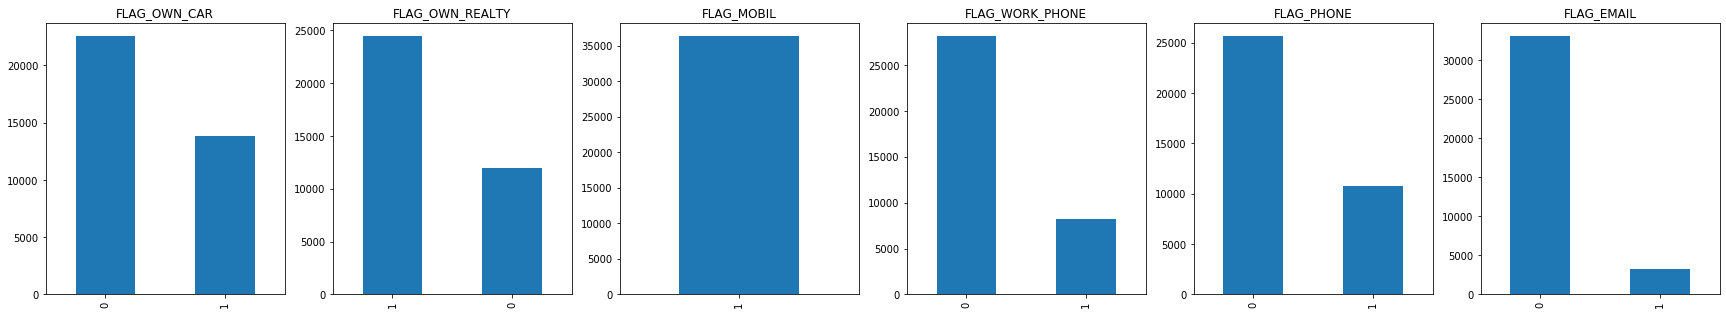

In [357]:
_, axes = plt.subplots(ncols=len(flag_col), figsize=(30, 5))
for col, ax in zip(flag_col, axes):
    credit[col].value_counts().plot(kind='bar', ax=ax, title=col)
plt.show()

In [358]:
# 由上图可知，FLAG_MOBIL全部为1，显然可以消除
credit.drop(columns='FLAG_MOBIL', axis=1, inplace=True)

In [359]:
name_cols = [col for col in credit.columns if col.startswith('NAME_')]
name_cols.append('OCCUPATION_TYPE')

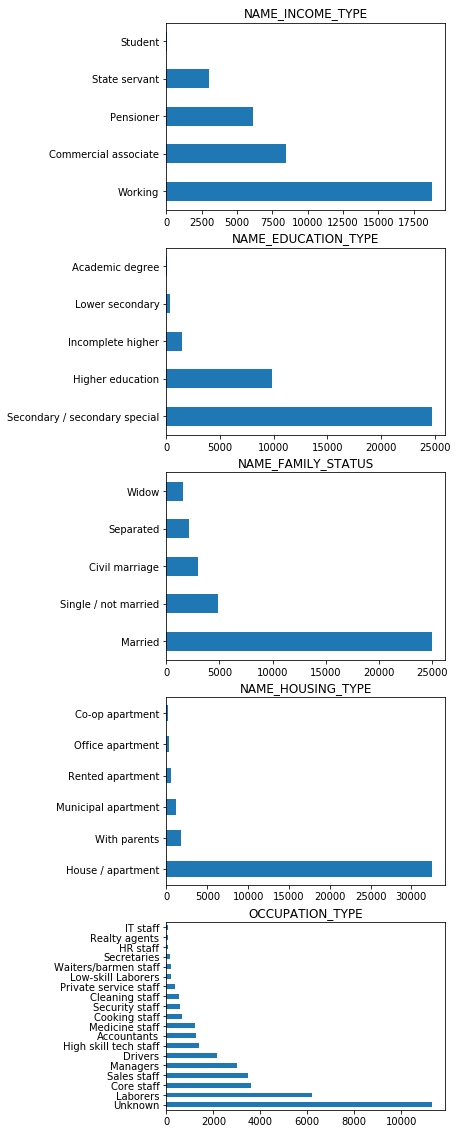

In [360]:
_, axes = plt.subplots(nrows=len(name_cols), figsize=(5, 20))
for col, ax in zip(name_cols, axes):
    credit[col].value_counts().plot(kind='barh', ax=ax, title=col)
plt.show()

In [361]:
amt_cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'month_on_book', 'age', 'work_year']

In [362]:
import seaborn as sns

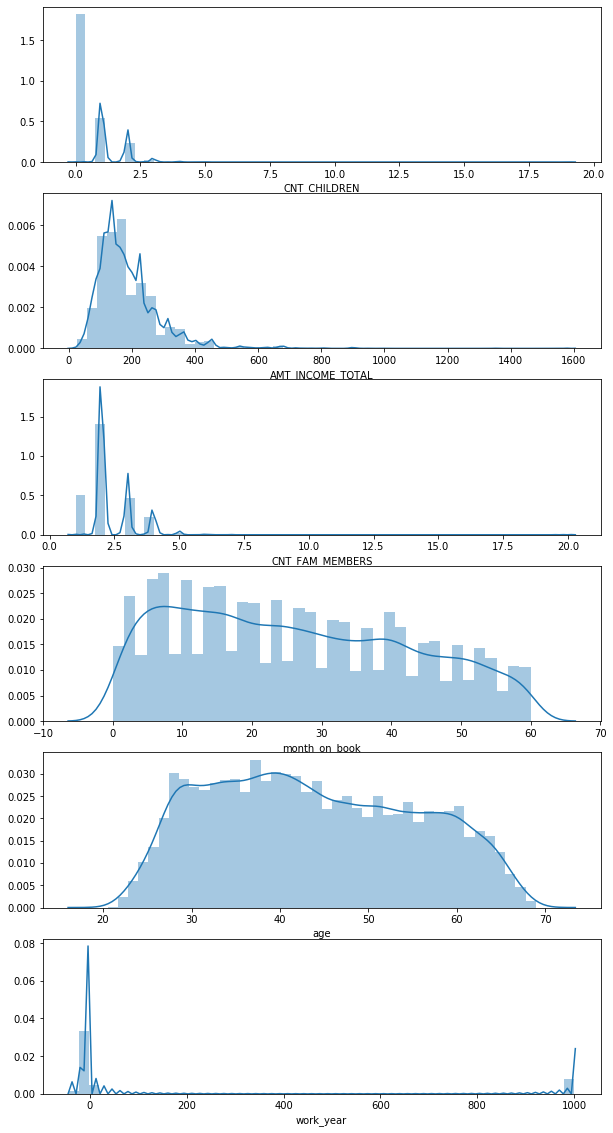

In [363]:
_, axes = plt.subplots(nrows=len(amt_cols), figsize=(10, 20))
for col, ax in zip(amt_cols, axes):
    sns.distplot(credit[col], ax=ax)
plt.show()

In [364]:
desc = round(credit[amt_cols].describe(), 0)
desc

,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,month_on_book,age,work_year
count,36457.0,36457.0,36457.0,36457.0,36457.0,36457.0
mean,0.0,187.0,2.0,26.0,44.0,162.0
std,1.0,102.0,1.0,17.0,12.0,377.0
min,0.0,27.0,1.0,-0.0,21.0,-43.0
25%,0.0,122.0,2.0,12.0,34.0,-9.0
50%,0.0,158.0,2.0,24.0,43.0,-4.0
75%,1.0,225.0,3.0,39.0,53.0,-1.0
max,19.0,1575.0,20.0,60.0,69.0,1001.0


In [365]:
credit[credit['work_year'] > 0]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,age,work_year,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,month_on_book
7,5008812,0,0,1,0,283.50,Pensioner,Higher education,Separated,House / apartment,61.545205,1000.665753,0,0,0,Unknown,1.0,0,20.0
8,5008813,0,0,1,0,283.50,Pensioner,Higher education,Separated,House / apartment,61.545205,1000.665753,0,0,0,Unknown,1.0,0,16.0
9,5008814,0,0,1,0,283.50,Pensioner,Higher education,Separated,House / apartment,61.545205,1000.665753,0,0,0,Unknown,1.0,0,17.0
69,5008884,0,0,1,0,315.00,Pensioner,Secondary / secondary special,Widow,House / apartment,55.304110,1000.665753,0,0,0,Unknown,1.0,0,40.0
150,5008974,0,0,1,0,112.50,Pensioner,Secondary / secondary special,Married,House / apartment,61.147945,1000.665753,0,0,0,Unknown,2.0,0,49.0
151,5008975,0,0,1,0,112.50,Pensioner,Secondary / secondary special,Married,House / apartment,61.147945,1000.665753,0,0,0,Unknown,2.0,0,49.0
152,5008976,0,0,1,0,112.50,Pensioner,Secondary / secondary special,Married,House / apartment,61.147945,1000.665753,0,0,0,Unknown,2.0,0,1.0
153,5008977,0,0,1,0,112.50,Pensioner,Secondary / secondary special,Married,House / apartment,61.147945,1000.665753,0,0,0,Unknown,2.0,0,23.0
154,5008978,0,0,1,0,112.50,Pensioner,Secondary / secondary special,Married,House / apartment,61.147945,1000.665753,0,0,0,Unknown,2.0,0,38.0
155,5008979,0,0,1,0,112.50,Pensioner,Secondary / secondary special,Married,House / apartment,61.147945,1000.665753,0,0,0,Unknown,2.0,0,37.0


有6135条数据存在work_year异常值，且全部为退休人员

In [366]:
# 使用插值法，将异常值替换为去掉异常值之后的平均值
credit.loc[credit['work_year'] > 0, 'work_year'] = credit[credit['work_year'] < 0]['work_year'].mean()
credit['work_year'] = -credit['work_year']

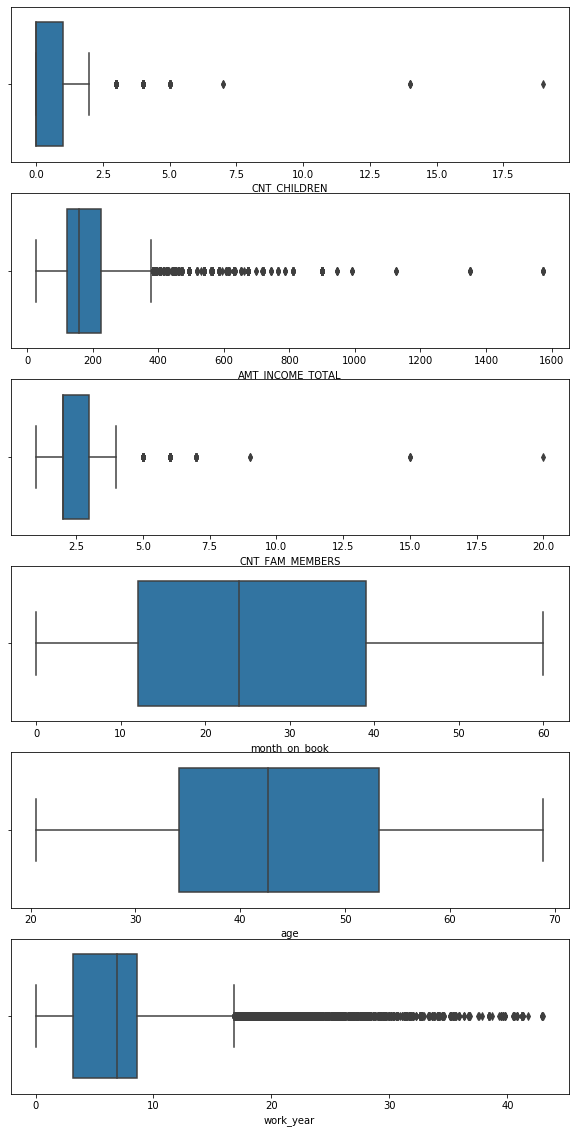

In [367]:
_, axes = plt.subplots(nrows=len(amt_cols), figsize=(10, 20))
for col, ax in zip(amt_cols, axes):
    sns.boxplot(credit[col], ax=ax)
plt.show()

## 变量分箱

In [368]:
credit.describe()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,age,work_year,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,target,month_on_book
count,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.329895,0.379708,0.672189,0.430315,186.685737,43.767598,7.247955,0.225526,0.294813,0.089722,2.198453,0.016897,26.164193
std,4.187524e+04,0.470181,0.485321,0.469422,0.742367,101.789226,11.508356,5.890187,0.417934,0.455965,0.285787,0.911686,0.128886,16.501854
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,27.000000,20.517808,0.046575,0.000000,0.000000,0.000000,1.000000,0.000000,-0.000000
25%,5.042028e+06,0.000000,0.000000,0.000000,0.000000,121.500000,34.142466,3.202740,0.000000,0.000000,0.000000,2.000000,0.000000,12.000000
50%,5.074614e+06,0.000000,0.000000,1.000000,0.000000,157.500000,42.638356,6.898630,0.000000,0.000000,0.000000,2.000000,0.000000,24.000000
75%,5.115396e+06,1.000000,1.000000,1.000000,1.000000,225.000000,53.254795,8.638356,0.000000,1.000000,0.000000,3.000000,0.000000,39.000000
max,5.150487e+06,1.000000,1.000000,1.000000,19.000000,1575.000000,68.909589,43.049315,1.000000,1.000000,1.000000,20.000000,1.000000,60.000000


18


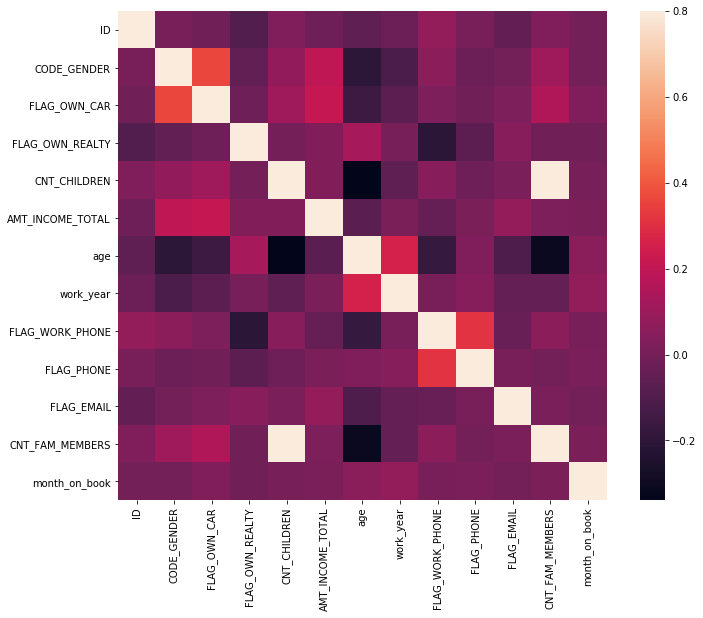

In [369]:
feat_cols: list = credit.columns.to_list()
feat_cols.remove('target')
feat_cols
credit_train:pd.DataFrame = credit[feat_cols]
corr_mat = credit_train.corr()
_, _ = plt.subplots(figsize=(12, 9))
print(len(feat_cols))
sns.heatmap(corr_mat, vmax=.8, square=True)

小孩个数和家庭成员个数显然相关

* ### 小孩个数

In [370]:
credit[credit['CNT_CHILDREN'] >= 2].count()['CNT_CHILDREN'] / credit.count()['CNT_CHILDREN']

0.10324491867131141

可以看出有超过2个小孩的家庭占少数，应当进行合并

In [371]:
credit.loc[credit['CNT_CHILDREN'] >= 2, 'CNT_CHILDREN'] = 'more'

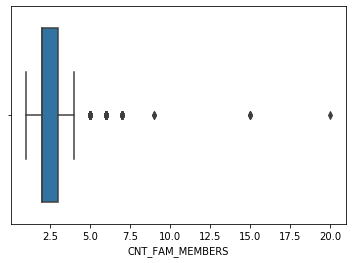

In [372]:
sns.boxplot(credit['CNT_FAM_MEMBERS'])

* ### 家庭成员个数

In [373]:
# 将3个及其以上的家庭CNT_FAM_MEMBERS设为more
credit.loc[credit['CNT_FAM_MEMBERS'] >= 3, 'CNT_FAM_MEMBERS'] = 'more'

In [374]:
credit['CNT_FAM_MEMBERS'].value_counts()

2.0     19463
more    10007
1.0      6987
Name: CNT_FAM_MEMBERS, dtype: int64

In [375]:
credit.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'age', 'work_year',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'target', 'month_on_book'],
      dtype='object')

In [376]:
total = credit.isnull().sum().sort_values(ascending=False)
percent = (credit.isnull().sum()/credit.isnull().count()).sort_values(ascending=False)
type(total)

pandas.core.series.Series

In [377]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
month_on_book,0,0.0
NAME_FAMILY_STATUS,0,0.0
CODE_GENDER,0,0.0
FLAG_OWN_CAR,0,0.0
FLAG_OWN_REALTY,0,0.0
CNT_CHILDREN,0,0.0
AMT_INCOME_TOTAL,0,0.0
NAME_INCOME_TYPE,0,0.0
NAME_EDUCATION_TYPE,0,0.0
NAME_HOUSING_TYPE,0,0.0


In [378]:
credit['target'].value_counts()

0    35841
1      616
Name: target, dtype: int64

In [379]:
df=credit.sample(frac=1)

In [380]:
fraud_df = df.loc[df['target']==1]
non_fraud_df = df.loc[df['target']==0][:616]
print(fraud_df.shape)
print(non_fraud_df.shape)

(616, 19)
(616, 19)


In [381]:
normal_distributed = pd.concat([fraud_df, non_fraud_df])
print(normal_distributed.shape)
normal_distributed.head()

(1232, 19)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,age,work_year,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,month_on_book
36324,5104869,0,0,1,0,112.5,Working,Higher education,Married,House / apartment,33.189041,10.969863,0,0,0,Accountants,2,1,26.0
36215,5051085,1,1,0,more,315.0,Working,Secondary / secondary special,Married,House / apartment,32.978082,0.539726,0,0,0,Laborers,more,1,15.0
36237,5054525,0,0,0,more,180.0,Working,Secondary / secondary special,Single / not married,House / apartment,45.509589,22.928767,0,0,0,Unknown,more,1,9.0
36200,5047783,0,1,1,0,225.0,Commercial associate,Higher education,Civil marriage,House / apartment,32.545205,0.843836,1,1,0,Sales staff,2,1,47.0
36283,5090166,0,0,1,1,675.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,42.334247,2.356164,0,0,0,Security staff,2,1,18.0


In [382]:
new_df = normal_distributed.sample(frac=1, random_state=42)
print(new_df.shape)
new_df.head()

(1232, 19)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,age,work_year,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,month_on_book
28309,5116035,1,1,1,0,126.0,Working,Higher education,Single / not married,House / apartment,39.786301,2.364384,1,0,0,Managers,1,1,32.0
24054,5096606,0,1,0,1,225.0,Working,Higher education,Civil marriage,House / apartment,37.063014,2.684932,1,1,0,Core staff,more,0,35.0
4856,5024917,0,0,1,0,112.5,Pensioner,Secondary / secondary special,Married,House / apartment,59.813699,7.247955,0,1,0,Unknown,2,1,37.0
18488,5069216,0,1,1,0,256.5,Commercial associate,Higher education,Married,House / apartment,30.712329,4.723288,1,0,0,Accountants,2,1,60.0
15948,5065399,0,1,1,0,157.5,Pensioner,Higher education,Separated,House / apartment,63.673973,7.247955,0,0,0,Unknown,1,0,13.0


Distribution of the target in the subample dataset
1    0.5
0    0.5
Name: target, dtype: float64


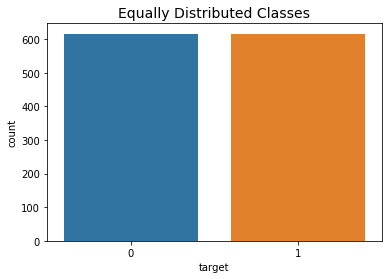

In [383]:
print('Distribution of the target in the subample dataset')
print(new_df['target'].value_counts()/len(new_df))
sns.countplot('target', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

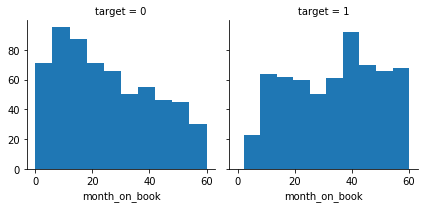

In [384]:
g = sns.FacetGrid(new_df, col='target')
g.map(plt.hist, 'month_on_book', bins=10)

In [385]:
import pandas as pd
import numpy as np
 
#读取数据集，至少包含变量和target两列
sample_set = new_df
 
def calc_score_median(sample_set, var):
    '''
    计算相邻评分的中位数，以便进行决策树二元切分
    param sample_set: 待切分样本
    param var: 分割变量名称
    '''
    var_list = list(np.unique(sample_set[var]))
    var_median_list = []
    for i in range(len(var_list) -1):
        var_median = (var_list[i] + var_list[i+1]) / 2
        var_median_list.append(var_median)
    return var_median_list

In [386]:
def choose_best_split(sample_set, var, min_sample):
    '''
    使用CART分类决策树选择最好的样本切分点
    返回切分点
    param sample_set: 待切分样本
    param var: 分割变量名称
    param min_sample: 待切分样本的最小样本量(限制条件)
    '''
    # 根据样本评分计算相邻不同分数的中间值
    score_median_list = calc_score_median(sample_set, var)
    median_len = len(score_median_list)
    sample_cnt = sample_set.shape[0]
    sample1_cnt = sum(sample_set['target'])
    sample0_cnt =  sample_cnt- sample1_cnt
    Gini = 1 - np.square(sample1_cnt / sample_cnt) - np.square(sample0_cnt / sample_cnt)
    
    bestGini = 0.0; bestSplit_point = 0.0; bestSplit_position = 0.0
    for i in range(median_len):
        left = sample_set[sample_set[var] < score_median_list[i]]
        right = sample_set[sample_set[var] > score_median_list[i]]
        
        left_cnt = left.shape[0]; right_cnt = right.shape[0]
        left1_cnt = sum(left['target']); right1_cnt = sum(right['target'])
        left0_cnt =  left_cnt - left1_cnt; right0_cnt =  right_cnt - right1_cnt
        left_ratio = left_cnt / sample_cnt; right_ratio = right_cnt / sample_cnt
        
        if left_cnt < min_sample or right_cnt < min_sample:
            continue
        
        Gini_left = 1 - np.square(left1_cnt / left_cnt) - np.square(left0_cnt / left_cnt)
        Gini_right = 1 - np.square(right1_cnt / right_cnt) - np.square(right0_cnt / right_cnt)
        Gini_temp = Gini - (left_ratio * Gini_left + right_ratio * Gini_right)
        if Gini_temp > bestGini:
            bestGini = Gini_temp; bestSplit_point = score_median_list[i]
            if median_len > 1:
                bestSplit_position = i / (median_len - 1)
            else:
                bestSplit_position = i / median_len
        else:
            continue
               
    Gini = Gini - bestGini
    return bestSplit_point, bestSplit_position

In [387]:
def bining_data_split(sample_set, var, min_sample, split_list):
  '''
  划分数据找到最优分割点list
  param sample_set: 待切分样本
  param var: 分割变量名称
  param min_sample: 待切分样本的最小样本量(限制条件)
  param split_list: 最优分割点list
  '''
  split, position = choose_best_split(sample_set, var, min_sample)
  if split != 0.0:
    split_list.append(split)
  # 根据分割点划分数据集，继续进行划分
  sample_set_left = sample_set[sample_set[var] < split]
  sample_set_right = sample_set[sample_set[var] > split]
  # 如果左子树样本量超过2倍最小样本量，且分割点不是第一个分割点，则切分左子树
  if len(sample_set_left) >= min_sample * 2 and position not in [0.0, 1.0]:
    bining_data_split(sample_set_left, var, min_sample, split_list)
  else:
    None
  # 如果右子树样本量超过2倍最小样本量，且分割点不是最后一个分割点，则切分右子树
  if len(sample_set_right) >= min_sample * 2 and position not in [0.0, 1.0]:
    bining_data_split(sample_set_right, var, min_sample, split_list)
  else:
    None

In [388]:
def get_bestsplit_list(sample_set, var):
  '''
  根据分箱得到最优分割点list
  param sample_set: 待切分样本
  param var: 分割变量名称
  '''
  # 计算最小样本阈值（终止条件）
  min_df = sample_set.shape[0] * 0.05
  split_list = []
  # 计算第一个和最后一个分割点
  bining_data_split(sample_set, var, min_df, split_list)
  return split_list

In [389]:
new_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,age,work_year,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,month_on_book
28309,5116035,1,1,1,0,126.0,Working,Higher education,Single / not married,House / apartment,39.786301,2.364384,1,0,0,Managers,1,1,32.0
24054,5096606,0,1,0,1,225.0,Working,Higher education,Civil marriage,House / apartment,37.063014,2.684932,1,1,0,Core staff,more,0,35.0
4856,5024917,0,0,1,0,112.5,Pensioner,Secondary / secondary special,Married,House / apartment,59.813699,7.247955,0,1,0,Unknown,2,1,37.0
18488,5069216,0,1,1,0,256.5,Commercial associate,Higher education,Married,House / apartment,30.712329,4.723288,1,0,0,Accountants,2,1,60.0
15948,5065399,0,1,1,0,157.5,Pensioner,Higher education,Separated,House / apartment,63.673973,7.247955,0,0,0,Unknown,1,0,13.0


In [390]:
split_list = get_bestsplit_list(sample_set, 'AMT_INCOME_TOTAL')

In [391]:
split_list.sort()

In [392]:
new_df.shape

(1232, 19)

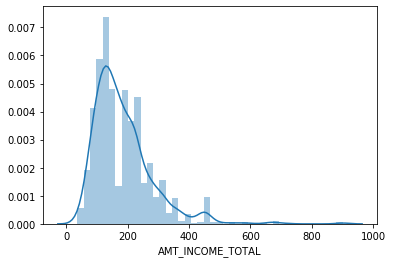

In [393]:
sns.distplot(new_df['AMT_INCOME_TOTAL'])

In [394]:
new_df.describe()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,age,work_year,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,target,month_on_book
count,1.232000e+03,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,5.081028e+06,0.345779,0.349026,0.643669,184.614308,43.924936,6.873845,0.219156,0.294643,0.081981,0.500000,29.278409
std,4.246029e+04,0.475815,0.476856,0.479109,97.036252,11.568876,5.615880,0.413842,0.456067,0.274446,0.500203,16.655869
min,5.008823e+06,0.000000,0.000000,0.000000,36.000000,22.030137,0.178082,0.000000,0.000000,0.000000,0.000000,-0.000000
25%,5.045799e+06,0.000000,0.000000,0.000000,112.500000,33.995890,2.776027,0.000000,0.000000,0.000000,0.000000,15.000000
50%,5.087746e+06,0.000000,0.000000,1.000000,157.500000,43.057534,6.519178,0.000000,0.000000,0.000000,0.500000,28.000000
75%,5.116745e+06,1.000000,1.000000,1.000000,225.000000,53.680822,8.230822,0.000000,1.000000,0.000000,1.000000,43.000000
max,5.150337e+06,1.000000,1.000000,1.000000,900.000000,67.772603,35.260274,1.000000,1.000000,1.000000,1.000000,60.000000


In [395]:
print(split_list)
def split_name(x, sp_list, feat_name):
    name = feat_name + '_'
    no = 1
    if x < sp_list[0]:
        return name + '0'
    for i in range(len(sp_list) - 1):
        if x > sp_list[i] and x < sp_list[i + 1]:
            return name + str(no)
        else:
            no += 1
    return name + str(len(sp_list))
        
new_df['AMT_INCOME_TOTAL'] = new_df['AMT_INCOME_TOTAL'].apply(func=split_name, args=(split_list, 'income'))
new_df['AMT_INCOME_TOTAL'].value_counts()

[87.3, 110.25, 119.25, 137.25, 159.75, 194.625, 204.75, 245.25, 281.25, 326.25]
i = 2
i = 6
i = 1
i = 7
i = 3
i = 4
nigger
i = 5
i = 1
i = 4
i = 2
i = 1
i = 3
nigger
i = 0
i = 6
i = 3
i = 6
i = 4
i = 2
i = 3
i = 2
i = 2
i = 7
i = 3
i = 3
i = 7
i = 4
i = 8
i = 0
i = 2
i = 1
i = 0
i = 3
i = 1
i = 4
i = 4
i = 1
nigger
nigger
i = 5
i = 4
i = 7
i = 5
nigger
nigger
i = 4
i = 0
i = 2
i = 2
i = 4
i = 6
i = 8
i = 6
i = 4
i = 8
i = 4
i = 0
i = 2
i = 4
i = 5
i = 8
i = 5
i = 2
i = 2
i = 6
i = 8
i = 4
i = 0
i = 1
i = 1
i = 4
i = 5
i = 4
i = 6
nigger
i = 2
i = 0
i = 1
nigger
i = 3
i = 6
i = 5
i = 4
i = 2
nigger
i = 0
i = 4
nigger
i = 7
i = 3
i = 7
nigger
i = 1
nigger
i = 1
i = 1
i = 2
i = 3
i = 4
nigger
i = 0
i = 8
i = 1
i = 0
nigger
i = 0
i = 7
i = 3
i = 3
i = 0
i = 2
i = 6
i = 2
i = 6
i = 3
i = 7
i = 2
i = 2
i = 6
i = 4
i = 4
nigger
i = 5
i = 0
i = 1
i = 2
i = 1
i = 2
i = 1
i = 7
i = 3
i = 2
i = 2
i = 5
i = 3
i = 6
i = 2
i = 3
i = 2
i = 4
i = 7
i = 6
i = 3
nigger
i = 0
i = 6
i = 1
i = 6
i = 6
i = 

income_3     187
income_5     154
income_7     144
income_1     126
income_4     122
income_2     103
income_8      89
income_0      88
income_10     85
income_6      68
income_9      66
Name: AMT_INCOME_TOTAL, dtype: int64

In [396]:
new_df['AMT_INCOME_TOTAL'].value_counts().sum()

1232

In [397]:
new_df['AMT_INCOME_TOTAL'].count()

1232